In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# additional packages needed
import time

# to run on IBM computer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools import backend_monitor

# import matplot lib
import matplotlib as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Quantum Random Walk
The quantum random walk uses the superpositon of states created by a H gate as a coin. Measurement is only taken at the end and the shift operators are created with NOT, CNOT, and Troffi gates. The shift operators move the state up or down a position. Two shift operators are used so that the gate can move in two different directions. The "walker" completes all steps before a measurement is made and the superposition of states is collapsed into a state which is the result of the random walk.

# Circular QRW
In the circular quantum random walk the "end" states are connected to one another. For example, for a 2 position qubit which has 4 states or nodes, the |00> and |11> states are connected to each other and movement is allowed across them. So if the walker starts in the |00> state, it can move to the |11> state or to the |01> state. Similarly, a walker starting in the |11> state can move to the |00> state or to the |10> state.

## Default Circular Quantum Walk
The circuit build in the first paper, which is refered to as the default circuit, only used a hadamard gate to split the coin at the beginning of the steps. This means that the walker either moves left or right and across multiple steps cannot switch directions left and right. The behavior of this circuit is shown below.

### Initial State |00>
The follow has all the same initial states |00> while different numbers of steps are explored.

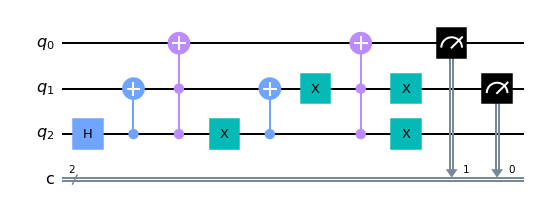

In [8]:
# one step of a quantum random walk on a circle 3 qubits (includes the qubit for the coin)
qc = QuantumCircuit(3, 2)

# we only want one coin operator
# check my number line to see if I want to look through the hadamard gate again
def circDefault(steps):
    # the circuit in the paper has the h gate only once at the beginning
    # only one decision to go left or right is made
    qc.h(2)
    for i in range(steps):
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
    # reverse this order (be consistent and do this for the other project)
    qc.measure([0, 1], [1, 0])

circDefault(1)
qc.draw()

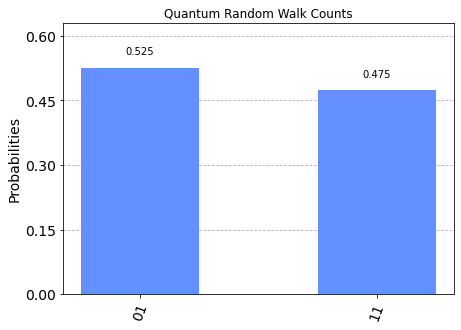

In [9]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

We start in the |00> state so we can move to the |11> state or to the |01> state with equal probability.

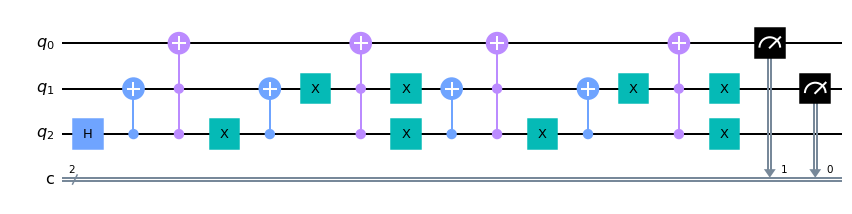

In [27]:
# try 2 steps
# only H gate at the beginning
qc = QuantumCircuit(3, 2)
circDefault(2)
qc.draw()

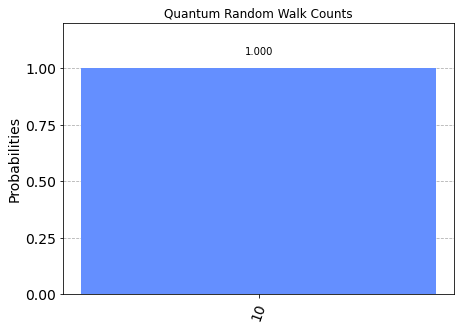

In [28]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Using the default circuit, only 1 state is allowed. Since there is only 1 coin operation, the walker "commits" to going "right" or "left" and can't change directions once it's taken that initial step. Quantum mechanically this means that the coin is created through a superposition and each element of the superposition begins its journey through the increamentors and decreamentors which send the walker "right" or "left" through the use of the CNOT gates. The walker will go "right" and "left" but each superposition can then only go in that one direction and it can't switch directions. This is why the only allowed state is the |10> state because starting from |00> and moving 2 steps "right" or "left" both end up in the |10> state. 

In [29]:
# try 3 steps
qc = QuantumCircuit(3, 2)
circDefault(3)

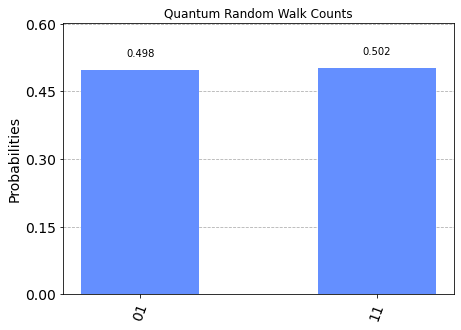

In [30]:
qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Now that 3 steps are taken, there are again 2 allowed states as the qubit can travel from |00> 3 steps "left" to |01> or 3 steps right to |11>.

In [31]:
# try 4 steps
qc = QuantumCircuit(3, 2)
circDefault(4)

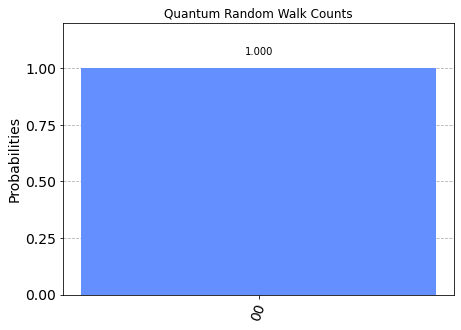

In [32]:
qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Again 4 steps only yields one allowed state which is the inital state |00> because 4 steps to the "right" or "left" both land on |00>. Any steps below 4 which resets to the initial state should follow the same pattern as the states descriped above.

### Initial State |10>
Try a different initial state to test if the results are as exspected.

In [35]:
# try 1 steps
qc = QuantumCircuit(3, 2)

# set initial condition
qc.x(0)
circDefault(1)

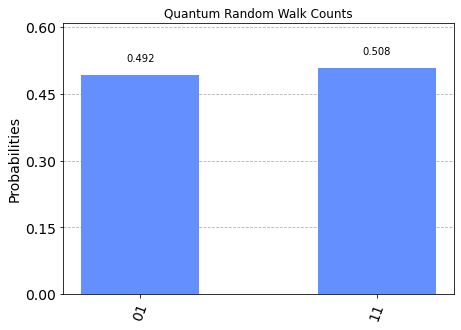

In [36]:
qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

This is the result that we would except since the states |01> and |11> are next to our initial state |10>.

### Default on IBM Hardware
We can run this circuit on the quantum computer. We will only run 1 step of this circuit at initial condition |00> as this will have the same result as when we modify the circuit to move left and right at each step.

In [51]:
# try 1 steps
qc = QuantumCircuit(3, 2)

# set initial condition
circDefault(1)

In [52]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


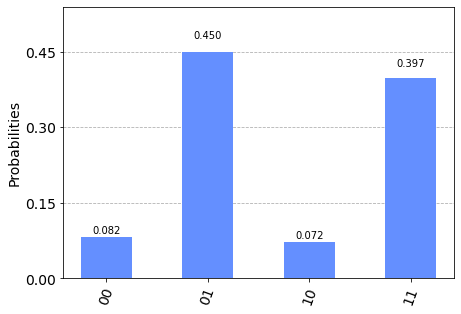

In [53]:
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                   and not x.configuration().simulator)
backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [39]:
backend_monitor(backend)

ibmq_manila
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 5
    backend_version: 1.0.29
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    dtm: 0.2222222222222222
    coupling_map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
    description: 5 qubit device
    open_pulse: False
    measure_esp_enabled: False
    timing_constraints: {'acquire_alignment': 16, 'granularity': 16, 'min_length': 64, 'pulse_alignment': 1}
    rep_times: [1000.0]
    dt: 0.2222222222222222
    multi_meas_enabled: True
    max_shots: 20000
    default_rep_delay: 250.0
    conditional: False
    online_date: 2021-04-28 04:00:00+00:00
    allow_object_storage: True
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of tran

## Modify to move left and right at each step
The following code modifies the Default circuit from the paper so that the walker can move left and right after each step.

This works if the first 2 steps taken have a H gate and the remaining steps do not have H gates. The circuit works as desired: after each step the walker can flip the coin again and move "right" or "left".

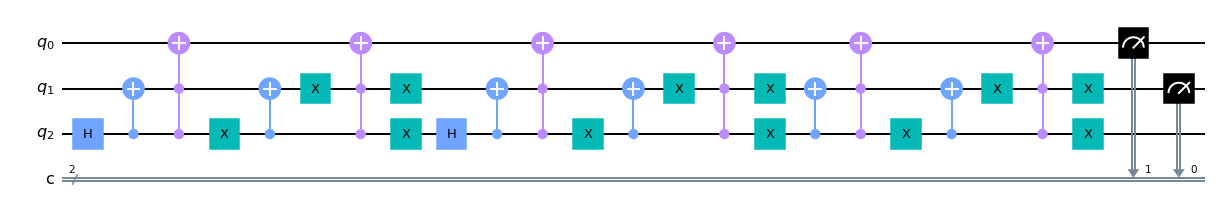

In [40]:
qc = QuantumCircuit(3, 2)

# this function has H gates present in the first two steps always and then removes H gates
# for all remaining steps
# the behavior is what we would expect for this type of circuit
def circ_rl(steps):
    # just the base circuit for 1 step
    if steps == 1:
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
    if steps > 1:
        # first iteration
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        # second iteration has a hadamard gate
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        for i in range(steps-2):
            qc.cx(2, 1)
            qc.ccx(2, 1, 0)
            qc.x(2)
            qc.cx(2, 1)
            qc.x(1)
            qc.ccx(2, 1, 0)
            qc.x(1)
            qc.x(2)
    
    # measure at the end always
    qc.measure([0, 1], [1, 0])
    
# example of this working as intended
circ_rl(3)

qc.draw()

The 1 step circuit is the same for all the variations. The 2 steps circuit is the same as in attempt 1 as the circuit setup did not change. Steps 3, 4, and 5 are shown below.

In [41]:
qc = QuantumCircuit(3, 2)
circ_rl(2)

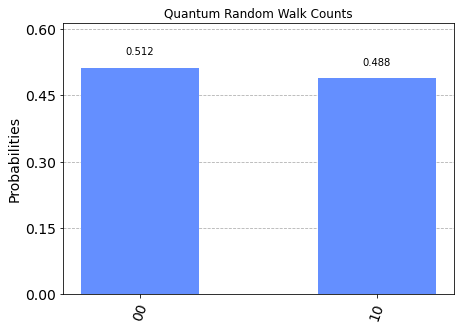

In [42]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The circuit now allows the walker to change directions and move back to the |00> state.

In [44]:
qc = QuantumCircuit(3, 2)
circ_rl(3)

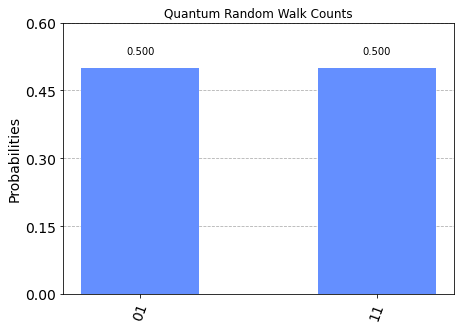

In [45]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The allowed states are |01> and |11>. These are the same as in the default circuit: when the walker is allowed to change directions it can still only end up in the |01> and |11> states.

In [46]:
qc = QuantumCircuit(3, 2)
circ_rl(4)

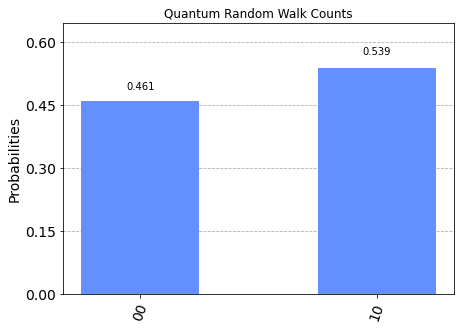

In [47]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Now the allowed states are |00> and |10> as opposed to the only allowed state being the initial state |00> as is the case for the default QRW. After each step, the walker is allowed to travel backwards. Each instance of the walker not taking all its steps in the same direction results in the state |10>.

At 5 steps the process repeats itself and the resulting allowed states are the same as for 1 step.

### Initial State |01>
Try a different initial state to test if the results are as expected.

In [49]:
# try 1 steps
qc = QuantumCircuit(3, 2)

# set initial condition
qc.x(1)
circ_rl(1)

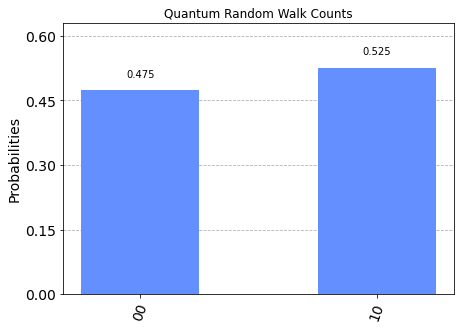

In [50]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

This gives the expected result as the walker can move from initial position |01> to |00> or |10>.

### Left and Right on IBM Computer
We run the |01> initial condition, 2 step example.

In [61]:
# try 1 steps
qc = QuantumCircuit(3, 2)

# set initial condition
qc.x(1)
circ_rl(2)

In [62]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


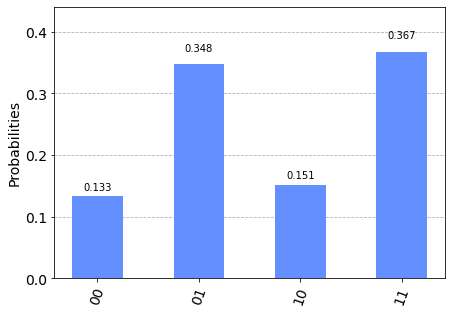

In [63]:
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                   and not x.configuration().simulator)
backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [ ]:
backend_monitor(backend)

## Comparison
The errors seem slightly higher when 2 steps are taken but the allowed states are still distinguishable from the disallowed states.

# Number Line QRW
This is the attempt to build a circuit that performs a QRW on a straight line so that starting in the |00> state does not allow one to move to the |11> state.

## The circuit
This circuit is based on the circuit from the P paper. The end states are tested |11> and |00> for step 1 and it is foudn that they can only move in the allowed direction. The other steps yield the same results as for the left right circuit as more steps allow the walker to move to the same positions.

The probability distributions are all still around 50/50 which is unexpected.

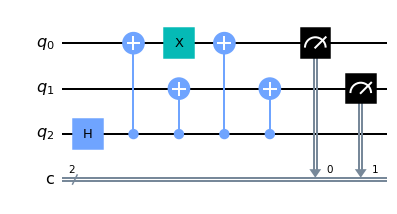

In [6]:
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

# test the |00> state

def step2(steps):
    # just the base circuit for 1 step
    if steps == 1:
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        #qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        
    if steps > 1:
        # first iteration
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        
        # second iteration has a hadamard gate
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        #qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        
        for i in range(steps-2):
            qc.cx(c, q0)
            qc.cx(c, q1)
            #qc.cx(q0, q1)
            qc.x(q0)
            qc.cx(c, q0)
            qc.cx(c, q1)
    
    # measure at the end always
    qc.measure([0, 1], [0, 1])
    
# example of this working as intended
step2(1)

# this looks right!
qc.draw()

## Intitial State |00>
This is starting at the end of the number line.

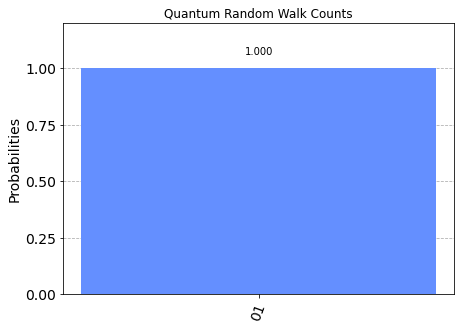

In [72]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 2000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')

The walker can only travel to the |01> state since the |11> state is restricted.

## Initial State |11>
This is starting at the other end.

In [75]:
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

# test the |11> state
qc.x(0)
qc.x(1)

step2(1)

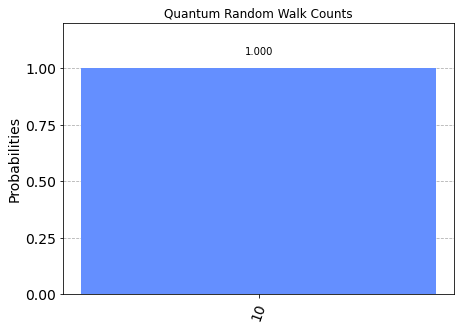

In [76]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 2000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')

In [ ]:
Starting at the other end of the number line, the walker can only travel to the |10> state.

The other steps follow the same pattern as the left/right circuit. The circuit breaks down when new initial conditions are applied so its not a general quantum random walk on a straight line circuit.

## Number Line on IBM Hardware

In [77]:
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

# test the |00> state
step2(1)

In [78]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


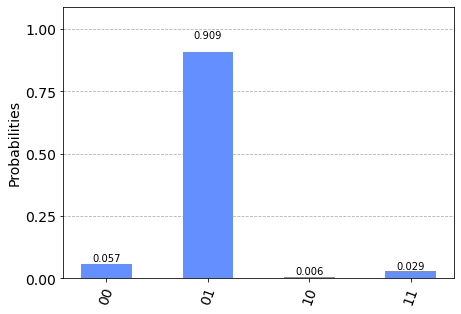

In [79]:
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                   and not x.configuration().simulator)
backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

The total error rate is around 10% which is on the lower end of the errors for the other circuits.

In [80]:
backend_monitor(backend)

ibmq_manila
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.0.29
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    dtm: 0.2222222222222222
    coupling_map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]
    description: 5 qubit device
    open_pulse: False
    measure_esp_enabled: False
    timing_constraints: {'acquire_alignment': 16, 'granularity': 16, 'min_length': 64, 'pulse_alignment': 1}
    rep_times: [1000.0]
    dt: 0.2222222222222222
    multi_meas_enabled: True
    max_shots: 20000
    default_rep_delay: 250.0
    conditional: False
    online_date: 2021-04-28 04:00:00+00:00
    allow_object_storage: True
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of tran

# Weighted Coin
This section implements a weighted coin to the QRW. The H gate acts as a fair coin meaning that the probability of traveling left or right should be the same. A weighted coin is biased in one direction. This is achieved through initializing the circuit to the state $\frac{1}{\sqrt(5)} |0> + \frac{2}{\sqrt(5)} |1>$ which creates a superposition state with unequal probabilities.

The behavior of the coin is observed below.

## Replacing H gate with Different Initialization

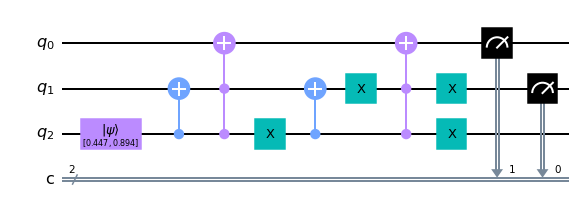

In [7]:
qc = QuantumCircuit(3, 2)

# the superposition state for the coin
initial_state = [1/np.sqrt(5), 2/np.sqrt(5)]
# this function has H gates present in the first two steps always and then removes H gates
# for all remaining steps
# the behavior is what we would expect for this type of circuit
def circ_wc(steps):
    # just the base circuit for 1 step
    if steps == 1:
        qc.initialize(initial_state, 2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
    if steps > 1:
        # first iteratin
        qc.initialize(initial_state, 2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        # second iteration has a hadamard gate
        qc.h(2)
        qc.cx(2, 1)
        qc.ccx(2, 1, 0)
        qc.x(2)
        qc.cx(2, 1)
        qc.x(1)
        qc.ccx(2, 1, 0)
        qc.x(1)
        qc.x(2)
        
        for i in range(steps-2):
            qc.cx(2, 1)
            qc.ccx(2, 1, 0)
            qc.x(2)
            qc.cx(2, 1)
            qc.x(1)
            qc.ccx(2, 1, 0)
            qc.x(1)
            qc.x(2)
    
    # measure at the end always
    qc.measure([0, 1], [1, 0])
    
# example of this working as intended
circ_wc(1)

qc.draw()

## Distributions
The distribution of the weighted coin with initial condition |00>

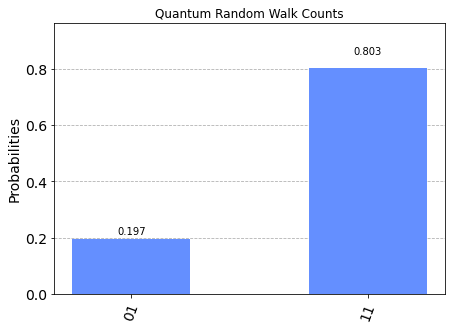

In [82]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The results show that the "coin" is biased to moving to the "left".

In [85]:
# 2 steps
qc = QuantumCircuit(3, 2)
circ_wc(2)

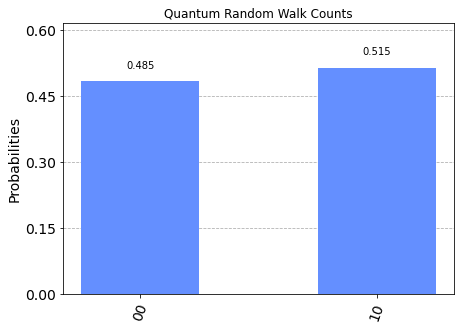

In [86]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The results are the same as they were without the bias. This is likely due to the fact that the initial direction of the coin (left or right) end up at the same state and only the secend decision "stay" or "change" directions affects the outcome.

In [87]:
# 3 steps
qc = QuantumCircuit(3, 2)
circ_wc(3)

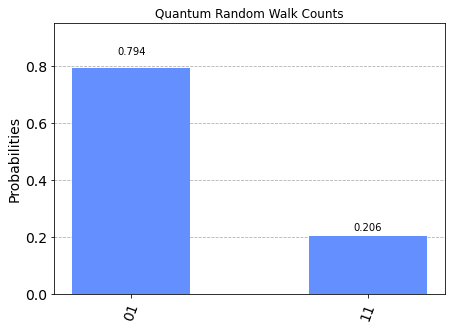

In [88]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

With an odd number of steps we again see the bias.

In [91]:
# 4 steps
qc = QuantumCircuit(3, 2)
circ_wc(4)

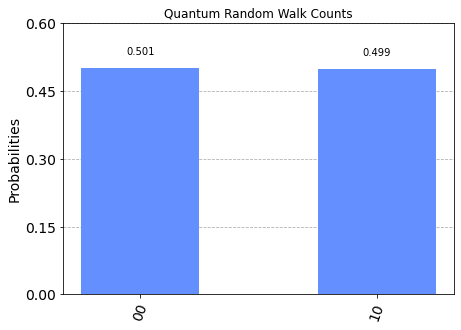

In [92]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The bias does not affect the results for the same reason as the step 2 circuit.

## Different Initial Condition
See if the distribution is similar with a different initial condition. We choose |10>.

In [95]:
# 1 steps
qc = QuantumCircuit(3, 2)

# initial condition |10>
qc.x(0)

circ_wc(1)

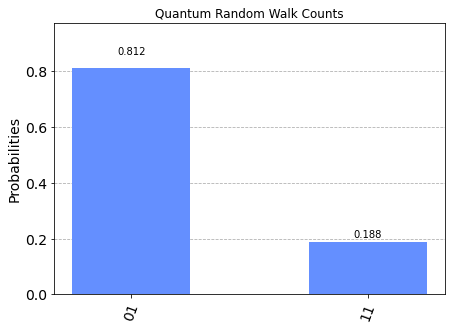

In [94]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

In [96]:
# 2 steps
qc = QuantumCircuit(3, 2)

# initial condition |10>
qc.x(0)

circ_wc(2)

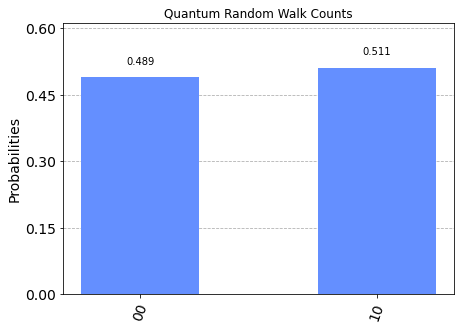

In [97]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

In [98]:
# 3 steps
qc = QuantumCircuit(3, 2)

# initial condition |10>
qc.x(0)

circ_wc(3)

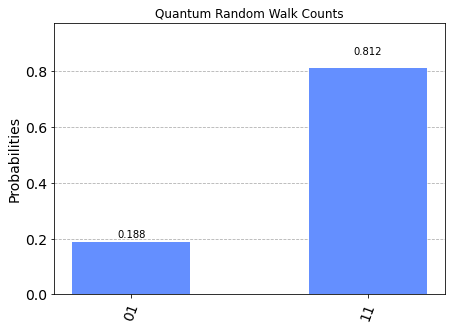

In [99]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

In [100]:
# 4 steps
qc = QuantumCircuit(3, 2)

# initial condition |10>
qc.x(0)

circ_wc(4)

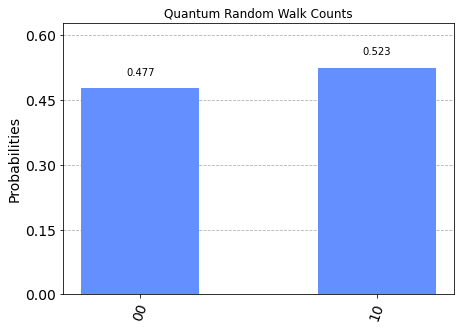

In [101]:
# try it on the simulator
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# can change the steps
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

The initial condition |10> reveals the same pattern as with the |00> initial condition.

## Weighted Coin on IBM Hardware
See how the errors on the IBM Hardware are effected.

In [102]:
# 1 step
qc = QuantumCircuit(3, 2)

circ_wc(1)

In [103]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


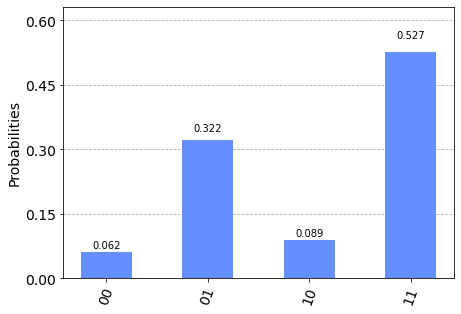

In [104]:
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                   and not x.configuration().simulator)
backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [ ]:
backend_monitor(backend)

We get errors but there is still an obvious bias.

# Sources

Andersson, S., & Wanzambi, E. (2021). Studying Quantum Walks on Near-Term Quantum Computers. 
    Qiskit.